In [3]:
cd C:\Data\20170412\p4_1

C:\Data\20170412\p4_1


In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A498-0A2C

 Directory of C:\Data\20170412\p4_1

04/13/2017  10:57 AM    <DIR>          .
04/13/2017  10:57 AM    <DIR>          ..
04/12/2017  01:03 PM        24,126,906 acquireIntanBrush_170412 1303 42.mat
04/12/2017  01:01 PM        85,810,514 brushPress_170412_130042.rhd
04/12/2017  01:02 PM        85,862,018 brushPress_170412_130141.rhd
04/12/2017  01:03 PM        85,862,018 brushPress_170412_130241.rhd
04/12/2017  01:03 PM         1,498,466 brushPress_170412_130341.rhd
               5 File(s)    283,159,922 bytes
               2 Dir(s)  719,652,995,072 bytes free


In [7]:
import sys
sys.path.append('C://Users/Ginty Lab/My Documents/Github/kwik-tools')
import read_rhd as rhd
import numpy as np
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline


Reading Intan Technologies RHD2000 Data File, Version 1.5

Found 32 amplifier channels.
Found 3 auxiliary input channels.
Found 1 supply voltage channel.
Found 0 board ADC channels.
Found 2 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 59.976 seconds of data.  Amplifiers were sampled at 20.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Applying notch filter...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Done!  Elapsed time: 3.8 seconds
(299880, 3)

Reading Intan Technologies RHD2000 Data File, Version 1.5

Found 32 amplifier channels.
Found 3 auxiliary input channels.
Found 1 supply voltage channel.
Found 0 board ADC channels.
Found 2 board digital input channels.
Found 0 boar

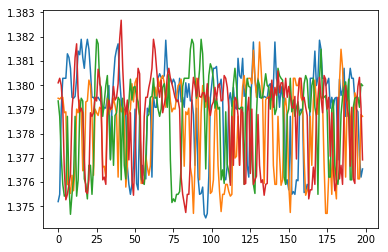

In [20]:
basename = 'brushPress_170412_'

#batch write .rhd to .dat
    
for file in glob.glob(basename + '*.rhd'):
    d = rhd.read_rhd(file)
    recordings = np.transpose(d['amplifier_data'])
    stimulation = np.transpose(d['aux_input_data'])
    digital = np.transpose(d['board_dig_in_data'])
    print(stimulation.shape)
    plt.plot(stimulation[1:200,1])
    recordings.tofile(os.path.splitext(file)[0] +'.dat')  #strip .rhd file extension and append .dat
    stimulation.tofile(os.path.splitext(file)[0] +'.stim')
    digital.tofile(os.path.splitext(file)[0] + '.dig')

#create .prm file    
files = glob.glob(basename + '*.dat')
prb_file = 'A1x32-Poly2-5mm-50s-177-A32.prb'
print(files)

with open(basename + '.prm', "w") as text_file:
        text_file.write('experiment_name = \'{0}\' \n'.format(basename))
        text_file.write('prb_file = \'{0}\'\n'.format(prb_file)) 
        text_file.write('traces = dict( \n')
        text_file.write('\traw_data_files={0},\n'.format(files))
        text_file.write('\tvoltage_gain={0}.0,\n'.format(192))  #from Intan RHD2000 documentation
        text_file.write('\tsample_rate={0},\n'.format(d['frequency_parameters']['amplifier_sample_rate']))
        text_file.write('\tn_channels={0},\n'.format(len(d['amplifier_channels'])))
        text_file.write('\tdtype=\'uint16\'\n')
        text_file.write('\t)')

    

